# Учебный проект 6_Линейные модели машинного обучения

## Содержание

* [Описание проекта](#описание-проекта)
* [Импорт библиотек Python и загрузка данных](#импорт-библиотек-python-и-загрузка-данных)
* [Предобработка данных](#предобработка-данных)
* [Исследовательский анализ данных](#исследовательский-анализ-данных)
* [Объединение данных](#объединение-данных)

## Описание проекта <a class = 'anchor' id = 'описание'></a>

На исследовании находятся данные `о текущем поголовье скота, родословной каждой коровы и список коров для будущей покупки`, которые были предоставлены фермером.

---

`Задача`

**Разработать модели машинного обучения для принятия решений о покупке коров на основании показателей**:

1. Средний удой коровы - **не менее 6 000 килограммов**;
2. **Молоко коров должно быть вкусным**.

---

`Путь решения`

Подготовить модели машинного обучения:
* Для прогнозирования удоя коровы - **модель линейной регрессии** (так как размер удоя - количественный показатель);
* Для прогнозирования вкуса молока - **модель логистической регрессии** (вкус молока - качественный показатель).

---

`Располагаемые данные`

**Данные о текущем состоянии стада - ferma_main**

* id - уникальный идентификатор коровы;
* Удой, кг — масса молока, которую корова даёт в год (в килограммах);
* ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы;
* Сырой протеин, г — содержание сырого протеина в корме (в граммах);
* СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы;
* Порода — порода коровы;
* Тип пастбища — ландшафт лугов, на которых паслась корова;
*порода папы_быка — порода папы коровы;
* Жирность,% — содержание жиров в молоке (в процентах);
* Белок,% — содержание белков в молоке (в процентах);
* Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно);
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

**Данные о родословной каждой коровы - ferma_dad**

* id — уникальный идентификатор коровы.;
* Имя Папы — имя папы коровы.

**Данные о списке коров для покупки - cow_buy**

* Порода — порода коровы;
* Тип пастбища — ландшафт лугов, на которых паслась корова;
* порода папы_быка — порода папы коровы;
* Имя_папы — имя папы коровы;
* Текущая_жирность,% — содержание жиров в молоке (в процентах);
* Текущий_уровень_белок,% — содержание белков в молоке (в процентах);
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

## Импорт библиотек Python и загрузка данных <a class = anchor id = 'Импорт'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
    * для решения задач машинного обучения.
2. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменных в соответствие с названиями загружаемых датасетов: **ferma_main**, **ferma_dad**, **cow_buy**;
3. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * общей информации о наборе данных;
4. Формирование вывода по итогам данного этапа.

In [39]:
# импорт библиотек python

# для манипулирования данными
import pandas as pd
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# методы машинного обучения
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [40]:
# загрузка данных в рабочую среду
try:
    ferma_main = pd.read_csv('C:/Users/User/Desktop/YandexPractikum_projects/datasets/ferma_main.csv', sep = ';') # основной набор данных о текущем состоянии стада
    ferma_dad = pd.read_csv('C:/Users/User/Desktop/YandexPractikum_projects/datasets/ferma_dad.csv', sep = ';') # данные о родословной каждой коровы
    cow_buy = pd.read_csv('C:/Users/User/Desktop/YandexPractikum_projects/datasets/cow_buy.csv', sep = ';') # данные о списке коров для покупки
except:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';')
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';')
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';')

In [41]:
# пользовательская функция для первичного изучения содержимого наборов данных
def  first_meeting (df : pd.DataFrame, df_name : str) -> None:
    print(f'Структура набора данных {df_name}')
    display(df.head())
    print()
    print(df.info())

# вывод на экран параметров датасетов
first_meeting(ferma_main, 'ferma_main')
first_meeting(ferma_dad, 'ferma_dad')
first_meeting(cow_buy, 'cow_buy')

Структура набора данных ferma_main


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст           

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None
Структура набора данных cow_buy


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
None


In [42]:
# вывод на экран статистической информации по наборам данных

print('Статистическая информация по набору ferma_main')
display(ferma_main.describe(include = 'all'))
print()
print('Статистическая информация по набору cow_buy')
display(cow_buy.describe(include = 'all'))

Статистическая информация по набору ferma_main


,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
count,634.000000,634.000000,634,634.000000,634,634,634,634,634,634,634,634
unique,NaN,NaN,55,NaN,12,2,3,3,50,15,2,2
top,NaN,NaN,"14,7",NaN,"0,94",Вис Бик Айдиал,Холмистое,Соверин,"3,72","3,076",вкусно,более_2_лет
freq,NaN,NaN,27,NaN,172,373,356,316,112,103,371,524
mean,317.460568,6187.025237,NaN,1922.682965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,183.096982,1638.401021,NaN,182.392548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,5204.000000,NaN,1660.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,159.250000,5751.750000,NaN,1772.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,317.500000,6130.500000,NaN,1880.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,475.750000,6501.000000,NaN,2058.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Статистическая информация по набору cow_buy


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
count,20,20,20,20,20,20,20
unique,2,2,2,4,12,12,2
top,РефлешнСоверинг,равнинное,Соверин,Буйный,"3,59","3,074",более_2_лет
freq,11,11,12,8,3,5,15


**Вывод**:
1. Импортированы библиотеки Python:
    * для манипулирования данными - **pandas, numpy**;
    * для визуализации данных - **matplotlib, seaborn**;
    * для решения задач машинного обучения - **sklearn**.
2. Проведена загрузка данных в рабочую среду Jupyter Notebook. Инициализированы переменные: `ferma_main`, `ferma_dad`, `cow_buy`;
3. Выведены на экран параметры датасетов:
    * общая структура наборов данных - демонстрация первых 5 строк;
    * общая информация о наборах данных;

**Вывод после первичного знакомства с данными**:

`ferma_main`
* **В таблице нет пропущенных значений** - вся информация о поголовье коров и их характеристиках доступна;
* Требуется явное приведение типов - **многие значения сохранены как тип object вместо float**. По этой причине на текущем этапе нельзя сделать выводы по количественным показателям;
* В таблице представлены коровы **2 разных пород**;
* Все коровы классифицированы по возрасту: **менее 2 лет**, **более 2 лет**;
* Породы пап быков представлены **3 разными видами**;
* Типы пастбищ - **3 разных типа**;
* Названия столбцов не удовлетворяют формату **snake_case** - необходимо выполнить переименование.

`rides`
* **В таблице нет пропущенных значений** - вся информация о поездках и их характеристиках доступна;
* **Среднее время поездки - 17.8 минут, Медианное время - 17.6 минут**. Характеристика **duration** не содержит **явных** выбросов;
* **Среднее расстояние - 3 070 метров, Медианное расстояние 3 133**. Характеристика **distance** не содержит **явных** выбросов;
* Необходимо явного преобразовать столбец **date** - привести к типу datetime;
* Названия столбцов полностью удовлетворяют формату **snake_case**.

`cow_buy`
* Таблица состоит из 20 строк - потенциальных коров для покупки;
* **В таблице нет пропущенных значений** - вся информация о поголовье коров и их характеристиках доступна;
* Требуется явное приведение типов - **многие значения сохранены как тип object вместо float**. По этой причине на текущем этапе нельзя сделать выводы по количественным показателям;
* В таблице представлены коровы **2 разных пород**;
* Все коровы классифицированы по возрасту: **менее 2 лет**, **более 2 лет**;
* Породы пап быков представлены **2 разными видами**;
* Типы пастбищ - **2 разных типа**.
* Названия столбцов не удовлетворяют формату **snake_case** - необходимо выполнить переименование.



## Предобработка данных <a class = 'anchor' id = 'предобработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Переименование столбцов датасетов в соответствие со стандартами 'snake_case';
2. Преобразование типов данных в **столбцах, подразумевающих количественные значения**. Преобразование значений из типа **object** в тип **float**:
    * `ferma_main`:
        * ЭКЕ (Энергетическая кормовая единица);
        * СПО (Сахаро-протеиновое соотношение);
        * Жирность,%;
        * Белок,%;
    * `cow_buy`:
        * Текущая_жирность,%;
        * Текущий_уровень_белок,%.
3. Дополнительная проверка наборов данных на наличие пустых значений;
4. Проверка наборов данных на наличие дубликатов:
    * Явные дубликаты;
    * Неявные дубликаты.
5. Формирование вывода по итогам этапа.

In [43]:
# приведение названий столбцов к формату 'snake_case'
ferma_main.columns = ['cow_id', 'yield', 'energy_unit', 'crude_protein', 'sugar_protein_ratio', 'breed_type', 'pasture_type', 'father_bull_breed', 'fats_content', 'protein_content', 'milk_taste', 'age']

ferma_dad.columns = ['cow_id', 'father_bull_name']

cow_buy.columns = ['breed_type', 'pasture_type', 'father_bull_breed', 'father_bull_name', 'current_fat_content', 'current_protein_content', 'age']

In [44]:
# проверка замены названий столбцов
for dataset in [ferma_main, ferma_dad, cow_buy]:
    for column in list(dataset.columns):
        print('* ' + column)
    print()

* cow_id
* yield
* energy_unit
* crude_protein
* sugar_protein_ratio
* breed_type
* pasture_type
* father_bull_breed
* fats_content
* protein_content
* milk_taste
* age

* cow_id
* father_bull_name

* breed_type
* pasture_type
* father_bull_breed
* father_bull_name
* current_fat_content
* current_protein_content
* age



In [45]:
# инициализация пользовательской функции по замене типов значений
def type_change(df : pd.DataFrame, columns : list):
    for column in columns:
        df[column] = df[column].str.replace(',', '.').astype(float)


# преобразование типов данных в 'ferma_main'
type_change(ferma_main, ['energy_unit', 'sugar_protein_ratio', 'fats_content', 'protein_content'])

# преобразование типов данных в 'cow_buy'
type_change(cow_buy, ['current_fat_content', 'current_protein_content'])

# проверка проведенных преобразований
print('Типы данных в датасете ferma_main')
display(ferma_main.dtypes)
print()
print('Типы данных в датасете cow_buy')
display(cow_buy.dtypes)

Типы данных в датасете ferma_main


cow_id                   int64
yield                    int64
energy_unit            float64
crude_protein            int64
sugar_protein_ratio    float64
breed_type              object
pasture_type            object
father_bull_breed       object
fats_content           float64
protein_content        float64
milk_taste              object
age                     object
dtype: object


Типы данных в датасете cow_buy


breed_type                  object
pasture_type                object
father_bull_breed           object
father_bull_name            object
current_fat_content        float64
current_protein_content    float64
age                         object
dtype: object

In [46]:
# ининциализация пользовательской функции проверки наборов данных на пустые значения
def check_missing_values(df : pd.DataFrame, df_name : str) -> None:
    print(f'Проверка датасета {df_name} на наличие пустых значений:')
    pivot_data = df.isnull().sum().to_frame().rename(columns = {0 : 'missing_values'})
    pivot_data['%_of_missing_values'] = round(pivot_data['missing_values'] * 100 / int(df.shape[0]), 2)
    display(pivot_data.sort_values(by = '%_of_missing_values', ascending=False))  

In [47]:
# проверка на пустые значения датасета 'ferma_main'
check_missing_values(ferma_main, 'ferma_main')

Проверка датасета ferma_main на наличие пустых значений:


,missing_values,%_of_missing_values
cow_id,0,0.0
yield,0,0.0
energy_unit,0,0.0
crude_protein,0,0.0
sugar_protein_ratio,0,0.0
breed_type,0,0.0
pasture_type,0,0.0
father_bull_breed,0,0.0
fats_content,0,0.0
protein_content,0,0.0


In [48]:
# проверка на пустые значения датасета 'ferma_dad'
check_missing_values(ferma_dad, 'ferma_dad')

Проверка датасета ferma_dad на наличие пустых значений:


,missing_values,%_of_missing_values
cow_id,0,0.0
father_bull_name,0,0.0


In [49]:
# проверка на пустые значения датасета 'ferma_dad'
check_missing_values(cow_buy, 'cow_buy')

Проверка датасета cow_buy на наличие пустых значений:


,missing_values,%_of_missing_values
breed_type,0,0.0
pasture_type,0,0.0
father_bull_breed,0,0.0
father_bull_name,0,0.0
current_fat_content,0,0.0
current_protein_content,0,0.0
age,0,0.0


In [50]:
# инициализация пользовательской функции для проверки датасетов на наличие явных дубликатов
def check_duplicates(df : pd.DataFrame):
    print(f"Количество явных дубликатов: {df.duplicated().sum()}")
    if df.duplicated().sum() > 0:
        print("Явные дубликаты:")
        display(df[df.duplicated()])
    else:
        print("Явных дубликатов нет.")

In [51]:
# проверка датасета 'ferma_main' на дубликаты
check_duplicates(ferma_main)

Количество явных дубликатов: 5
Явные дубликаты:


,cow_id,yield,energy_unit,crude_protein,sugar_protein_ratio,breed_type,pasture_type,father_bull_breed,fats_content,protein_content,milk_taste,age
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [52]:
# проверка датасета 'ferma_dad' на дубликаты
check_duplicates(ferma_dad)

Количество явных дубликатов: 0
Явных дубликатов нет.


In [53]:
# проверка датасета 'cow_buy' на дубликаты
check_duplicates(cow_buy)

Количество явных дубликатов: 4
Явные дубликаты:


,breed_type,pasture_type,father_bull_breed,father_bull_name,current_fat_content,current_protein_content,age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


**Вывод по промежуточному этапу**:

Обнаружены дубликаты в следующих датасетах:
    * `ferma_main`;
    * `cow_buy`.

Стоит отметить, что в датасете `ferma_main` строки являются полными дубликатами - их можно удалить встроенными методами pandas.

В датасете `cow_buy` дубликатами являются только 2 строки с индексами 8 и 14. Необходимо удалить только одну из них. **Остальные строки попали в дубликаты при технической ошибке**.

In [54]:
# сохранение изначального количества строк в наборах данных
ferma_main_rows = int(ferma_main.shape[0])
cow_buy_rows = int(cow_buy.shape[0])

# исключение дубликатов из набора данных 'ferma_main'
ferma_main = ferma_main.drop_duplicates(keep = 'first').reset_index(drop = True)
# исключение дубликатов из набора данных 'cow_buy'
cow_buy = cow_buy.drop(14, axis = 0).reset_index(drop = True)

# вывод на экран доли исключенных строк из наборов данных
print('Доля исключенных строк из набора ferma_main {:.2%}'.format(int(ferma_main_rows - int(ferma_main.shape[0])) / ferma_main_rows))
print('Доля исключенных строк из набора cow_buy {:.2%}'.format((cow_buy_rows - int(cow_buy.shape[0])) / cow_buy_rows))

Доля исключенных строк из набора ferma_main 0.79%
Доля исключенных строк из набора cow_buy 5.00%


In [55]:
# инициализация пользовательской функции для проверки наборов данных на наличие неявных дубликатов
def implicit_duplicates(df : pd.DataFrame):
    df = df.select_dtypes(include = 'object')
    for column in list(df.columns):
        print(f'Уникальные значения в столбце {column}:', df[column].unique())

In [56]:
# проверка датасета 'ferma_main' на наличие неявных дубликатов
implicit_duplicates(ferma_main)

Уникальные значения в столбце breed_type: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в столбце pasture_type: ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения в столбце father_bull_breed: ['Айдиал' 'Соверин' 'Айдиалл']
Уникальные значения в столбце milk_taste: ['вкусно' 'не вкусно']
Уникальные значения в столбце age: ['более_2_лет' 'менее_2_лет']


In [57]:
# проверка датасета 'ferma_dad' на наличие неявных дубликатов
implicit_duplicates(ferma_dad)

Уникальные значения в столбце father_bull_name: ['Буйный' 'Соловчик' 'Барин' 'Геркулес']


In [58]:
# проверка датасета 'cow_buy' на наличие неявных дубликатов
implicit_duplicates(cow_buy)

Уникальные значения в столбце breed_type: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в столбце pasture_type: ['холмистое' 'равнинное']
Уникальные значения в столбце father_bull_breed: ['Айдиал' 'Соверин']
Уникальные значения в столбце father_bull_name: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Уникальные значения в столбце age: ['более_2_лет' 'менее_2_лет']


**Вывод по промежуточному этапу**:

В датасете `ferma_main` обнаружены **неявные дубликаты**:
    * pasture_type - **Равнинное** и **Равнинные**;
    * father_bull_breed - **Айдиал** и **АйдиалЛ**;

Необходимо привести эти значения к эталонным из таблицы `cow_buy`.

Так же необходимо понизить регистр у всех значений типов object в наборах данных.

In [59]:
# инициализация пользовательской функции понижения регистра в значениях типа object в наборах данных
def lower_case(df : pd.DataFrame) -> pd.DataFrame:
    for column in list(df.select_dtypes(include = 'object').columns):
        df[column] = df[column].str.lower()
    return df

# понижение регистра в датасетах
ferma_main = lower_case(ferma_main)
ferma_dad = lower_case(ferma_dad)
cow_buy = lower_case(cow_buy)

In [60]:
# замена значений в датасете 'ferma_main'
ferma_main.loc[ferma_main['father_bull_breed'] == 'айдиалл', 'father_bull_breed'] = 'айдиал'
ferma_main.loc[ferma_main['pasture_type'] == 'равнинные', 'pasture_type'] = 'равнинное'

In [61]:
# проверка датасета 'ferma_main' на наличие неявных дубликатов
implicit_duplicates(ferma_main)

Уникальные значения в столбце breed_type: ['вис бик айдиал' 'рефлешнсоверинг']
Уникальные значения в столбце pasture_type: ['равнинное' 'холмистое']
Уникальные значения в столбце father_bull_breed: ['айдиал' 'соверин']
Уникальные значения в столбце milk_taste: ['вкусно' 'не вкусно']
Уникальные значения в столбце age: ['более_2_лет' 'менее_2_лет']


In [62]:
# проверка датасета 'cow_buy' на наличие неявных дубликатов
implicit_duplicates(cow_buy)

Уникальные значения в столбце breed_type: ['вис бик айдиал' 'рефлешнсоверинг']
Уникальные значения в столбце pasture_type: ['холмистое' 'равнинное']
Уникальные значения в столбце father_bull_breed: ['айдиал' 'соверин']
Уникальные значения в столбце father_bull_name: ['геркулес' 'буйный' 'барин' 'соловчик']
Уникальные значения в столбце age: ['более_2_лет' 'менее_2_лет']


**Вывод**:

1. Названия столбцов датасетов приведены к соответствию стандартам 'snake_case';
2. Преобразованы типы данных в **столбцах, подразумевающих количественные значения**. Преобразованы значения из типа **object** в тип **float**:
    * `ferma_main`:
        * ЭКЕ (Энергетическая кормовая единица);
        * СПО (Сахаро-протеиновое соотношение);
        * Жирность,%;
        * Белок,%;
    * `cow_buy`:
        * Текущая_жирность,%;
        * Текущий_уровень_белок,%.
3. Произведена дополнительная проверка наборов данных на наличие пустых значений. **Пустые значения в наборах данных отсутствуют**;
4. Проверка наборов данных на наличие дубликатов:
    * Исключены из наборов `ferma_main` и `cow_buy` строки, являвшиеся дубликатами;
    * Исключены неявные дубликаты из набора `ferma_main`.
5. Данные готовы к последующим шагам исследования.

## Исследовательский анализ данных <a class = 'anchor' id = 'исследование'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Вывод на экран основной статистической информации по текущим версиям наборов данных;
2. Исследование распределения количественных показателей наборов. Построение **гистограмм распределения значений**;
3. Исследование распределения качественных показателей в следующем контексте:
    * Соотношение коров в разрезе возраста;
    * Соотношение коров в разрезе быков-отцов;
    * Соотношение коров, дающих ВКУСНОЕ молоко, в разрезе быков-отцов;
    * Соотношение коров в разрезе пород;
    * Соотношение коров, дающих ВКУСНОЕ молоко, в разрезе пород;
    * Соотношение коров, дающих ВКУСНОЕ молоко, в разрезе типов пастбищ;
4. Формирование вывода по итогам этапа.

In [63]:
# вывод на экран основных статистик по набору 'ferma_main'
ferma_main.describe().T

,count,mean,std,min,25%,50%,75%,max
cow_id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
yield,629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
energy_unit,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
crude_protein,629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
sugar_protein_ratio,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
fats_content,629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
protein_content,629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


In [64]:
# вывод на экран основных статистик по набору 'ferma_main'
cow_buy.describe().T

,count,mean,std,min,25%,50%,75%,max
current_fat_content,19.0,3.576842,0.130258,3.340,3.480,3.590,3.660,3.770
current_protein_content,19.0,3.069263,0.010566,3.046,3.063,3.074,3.076,3.081


**Вывод по промежуточному этапу**:

Набор `ferma_main` характеризуется следующими статистическими показателями:

* **yield - удой, кг**:
    * Среднее значение - 6 189;
    * Минимальное значение - 5 204;
    * Максимальное значение - 45 616 (в наборе данных обнаружен явных выброс);
    * Стандартное отклонение - 1 644.8.
* **energy_unit - ЭКЕ (Энергетическая кормовая единица)**:
    * Среднее значение - 14.5;
    * Минимальное значение - 10.9;
    * Максимальное значение - 16.8;
    * Стандартное отклонение - 1.3. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **crude_protein - Сырой протеин, г**:
    * Среднее значение - 1 923.4;
    * Минимальное значение - 1 660;
    * Максимальное значение - 2 349;
    * Стандартное отклонение - 183. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **sugar_protein_ratio - СПО (Сахаро-протеиновое соотношение)**:
    * Среднее значение - 0.91;
    * Минимальное значение - 0.84;
    * Максимальное значение - 0.96;
    * Стандартное отклонение - 0.03. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **fats_content - Жирность,%**:
    * Среднее значение - 3.6;
    * Минимальное значение - 3.0;
    * Максимальное значение - 3.75;
    * Стандартное отклонение - 0.17. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **protein_content - Белок,%**:
    * Среднее значение - 3.076;
    * Минимальное значение - 3.069;
    * Максимальное значение - 3.085;
    * Стандартное отклонение - 0.003. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.


Набор `cow_buy` характеризуется следующими статистическими показателями:

* **current_fat_content - текущее содержание жиров**:
    * Среднее значение - 3.6;
    * Минимальное значение - 3.05;
    * Максимальное значение - 3.081;
    * Стандартное отклонение - 0.13. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.
* **current_protein_content - текущее содержание белка**:
    * Среднее значение - 3.07;
    * Минимальное значение - 3.046;
    * Максимальное значение - 3.081;
    * Стандартное отклонение - 0.01. По показателю можно сделать вывод о том, что данные плотно "упакованы". **Явных выбросов не обнаружено**.

In [65]:
# инициализация пользовательской функции по построению гистограмм по передаваемым метрикам
def histogram_plotting(data: pd.DataFrame, feature : str, bins: int, x_size: int, y_size: int, feature_xlabel : str):
    # вычисление статистических метрик для дальнейшей визуализации
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    upper_bound = q3 + 1.5 * (q3 - q1)
    lower_bound = q1 - 1.5 * (q3 - q1)

    # построение визуализации
    plt.figure(figsize = (x_size, y_size))
    plt.hist(data[feature], color = 'blue', edgecolor = 'white', bins = bins)
    plt.axvline(upper_bound, c = 'red', ls = '-', label = 'верхняя граница допустимых значений')
    plt.axvline(q3, c = 'red', ls = '--', label = '3 квартиль значений')
    plt.axvline(q1, c = 'black', ls = '--', label = '1 квартиль значений')
    plt.axvline(lower_bound, c = 'black', ls = '-', label = 'нижняя граница допустимых значений')
    plt.title(f'Гистограмма распределения значений по метрике: {feature_xlabel}', fontsize = 10)
    plt.xlabel(feature_xlabel)
    plt.ylabel('Количество значений по метрике')
    plt.legend()
    plt.show()

    # вывод статистических метрик на экран
    print('Верхняя допустимая граница значений:', upper_bound)
    print('Нижняя допустимая граница значений:', lower_bound)
    print('Медианное значение:', data[feature].median())
    print('Среднее значение:', round(data[feature].mean(), 2))

    # расчет доли аномальных значений по метрике
    print('Доля значений, выходящих за верхнюю границу: {:.2%}'.format(data[data[feature] > upper_bound].shape[0] / data[feature].shape[0]))
    print('Доля значений, выходящих за нижнюю границу: {:.2%}'.format(data[data[feature] < lower_bound].shape[0] / data[feature].shape[0]))

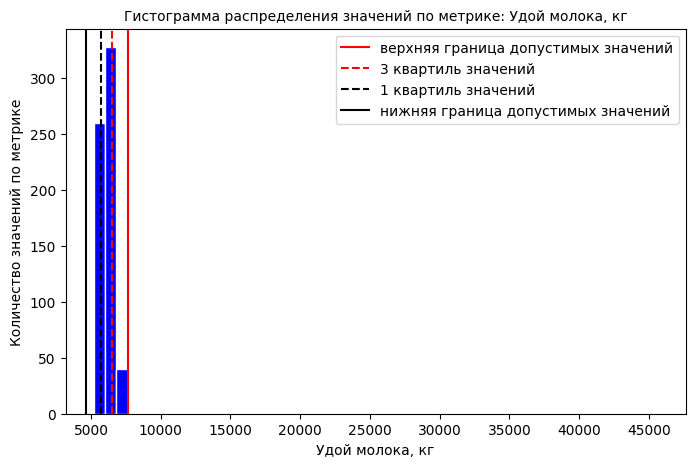

Верхняя допустимая граница значений: 7626.0
Нижняя допустимая граница значений: 4626.0
Медианное значение: 6133.0
Среднее значение: 6188.75
Доля значений, выходящих за верхнюю границу: 0.16%
Доля значений, выходящих за нижнюю границу: 0.00%


In [66]:
# построение визуализации по набору 'ferma_main' - характеристика "удой"
histogram_plotting(ferma_main, 'yield', 50, 8, 5, 'Удой молока, кг')

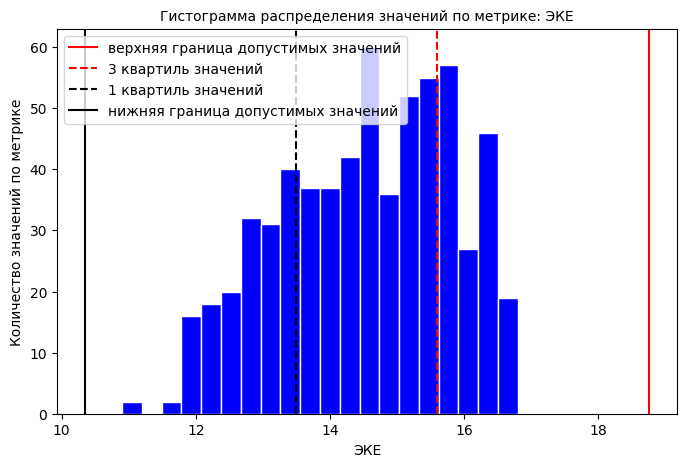

Верхняя допустимая граница значений: 18.75
Нижняя допустимая граница значений: 10.350000000000001
Медианное значение: 14.7
Среднее значение: 14.54
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [67]:
# построение визуализации по набору 'ferma_main' - характеристика "ЭКЕ"
histogram_plotting(ferma_main, 'energy_unit', 20, 8, 5, 'ЭКЕ')

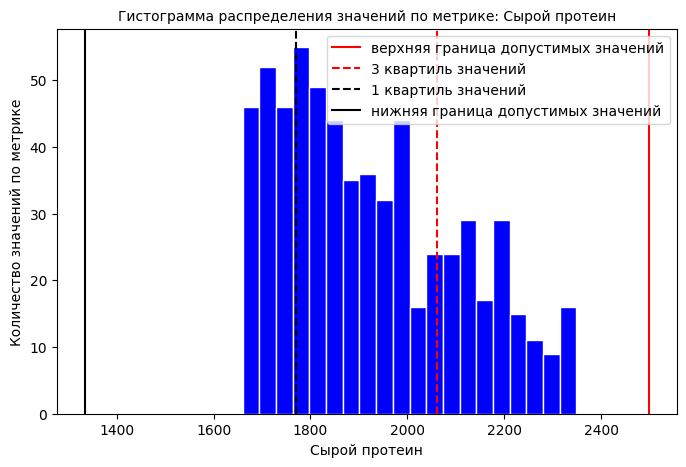

Верхняя допустимая граница значений: 2498.5
Нижняя допустимая граница значений: 1334.5
Медианное значение: 1888.0
Среднее значение: 1923.36
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [69]:
# построение визуализации по набору 'ferma_main' - характеристика "Сырой протеин"
histogram_plotting(ferma_main, 'crude_protein', 20, 8, 5, 'Сырой протеин')

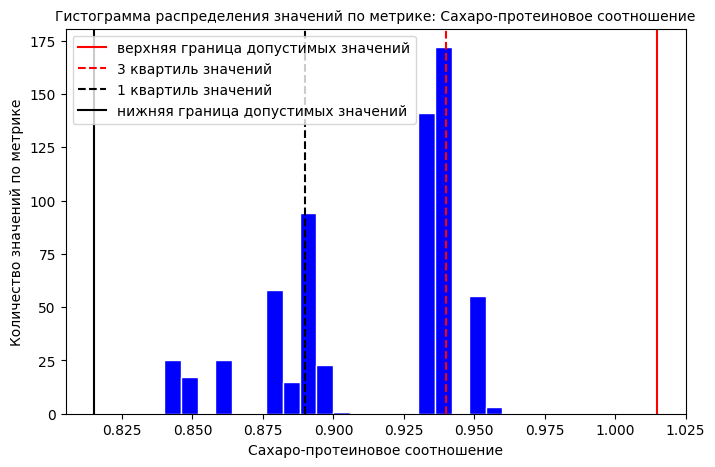

Верхняя допустимая граница значений: 1.015
Нижняя допустимая граница значений: 0.8150000000000002
Медианное значение: 0.93
Среднее значение: 0.91
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [70]:
# построение визуализации по набору 'ferma_main' - характеристика "Сахаро-протеиновое соотношение"
histogram_plotting(ferma_main, 'sugar_protein_ratio', 20, 8, 5, 'Сахаро-протеиновое соотношение')

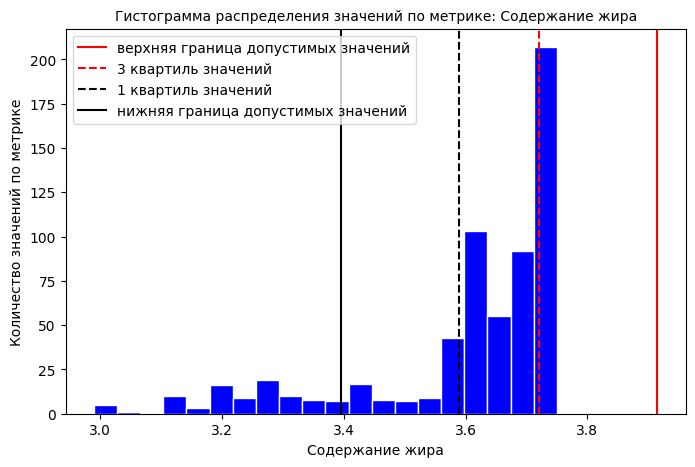

Верхняя допустимая граница значений: 3.915000000000001
Нижняя допустимая граница значений: 3.3949999999999996
Медианное значение: 3.65
Среднее значение: 3.6
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 13.83%


In [71]:
# построение визуализации по набору 'ferma_main' - характеристика "Содержание жира"
histogram_plotting(ferma_main, 'fats_content', 20, 8, 5, 'Содержание жира')

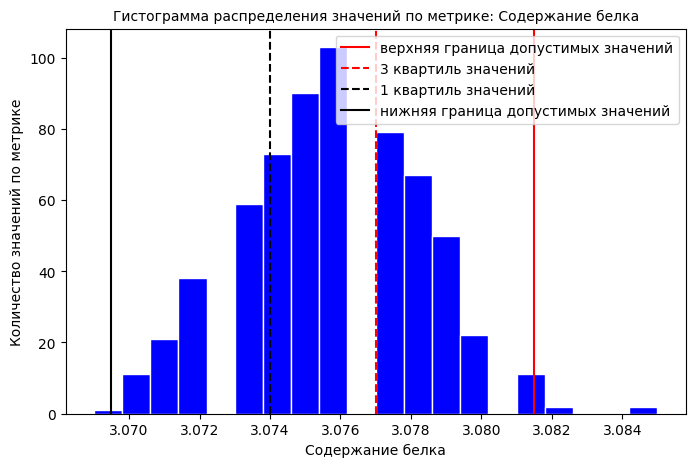

Верхняя допустимая граница значений: 3.0815
Нижняя допустимая граница значений: 3.0694999999999997
Медианное значение: 3.076
Среднее значение: 3.08
Доля значений, выходящих за верхнюю границу: 0.64%
Доля значений, выходящих за нижнюю границу: 0.16%


In [72]:
# построение визуализации по набору 'ferma_main' - характеристика "Содержание белка"
histogram_plotting(ferma_main, 'protein_content', 20, 8, 5, 'Содержание белка')

**Вывод по промежуточному этапу**:

Гистограммы подтверждают сформированные выводы на этапе вывод основных описательных статистик.

Необходимо исключить из набора данных `ferma_main` аномально большие показатели удоя молока.

In [73]:
# фильтрование аномально больших значений в наборе 'ferma_main' по признаку yield
ferma_main = ferma_main[ferma_main['yield'] <= (ferma_main['yield'].quantile(0.75)
                                                + 1.5 * (ferma_main['yield'].quantile(0.75) - ferma_main['yield'].quantile(0.25)))].reset_index(drop = True)

# вывод статистик по параметру yield
ferma_main['yield'].describe()

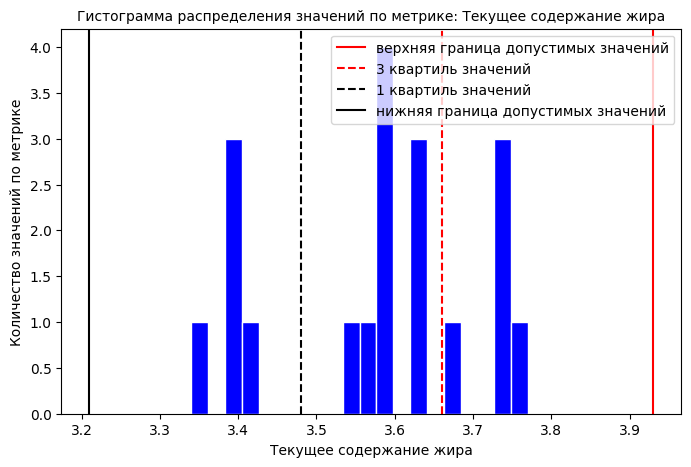

Верхняя допустимая граница значений: 3.9300000000000006
Нижняя допустимая граница значений: 3.21
Медианное значение: 3.59
Среднее значение: 3.58
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [76]:
# построение визуализации по набору 'cow_buy' - характеристика "Содержание жира"
histogram_plotting(cow_buy, 'current_fat_content', 20, 8, 5, 'Текущее содержание жира')

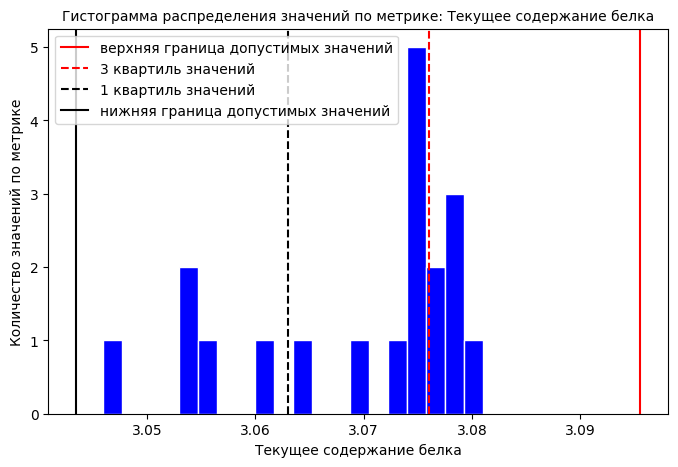

Верхняя допустимая граница значений: 3.0955000000000004
Нижняя допустимая граница значений: 3.043499999999999
Медианное значение: 3.074
Среднее значение: 3.07
Доля значений, выходящих за верхнюю границу: 0.00%
Доля значений, выходящих за нижнюю границу: 0.00%


In [78]:
# построение визуализации по набору 'cow_buy' - характеристика "Содержание белка"
histogram_plotting(cow_buy, 'current_protein_content', 20, 8, 5, 'Текущее содержание белка')

In [79]:
# объединение данных перед дальнейшим построением визуализации
full_ferma_data = ferma_main.merge(ferma_dad, how = 'left', on = 'cow_id')

# проверка полученного набора данных на наличие пустых значений
check_missing_values(full_ferma_data, 'full_ferma_data')

Проверка датасета full_ferma_data на наличие пустых значений:


,missing_values,%_of_missing_values
cow_id,0,0.0
yield,0,0.0
energy_unit,0,0.0
crude_protein,0,0.0
sugar_protein_ratio,0,0.0
breed_type,0,0.0
pasture_type,0,0.0
father_bull_breed,0,0.0
fats_content,0,0.0
protein_content,0,0.0


In [80]:
# вывод на экран структуры полученного датасета
full_ferma_data.head()

,cow_id,yield,energy_unit,crude_protein,sugar_protein_ratio,breed_type,pasture_type,father_bull_breed,fats_content,protein_content,milk_taste,age,father_bull_name
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,буйный
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,соловчик
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,барин
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,буйный
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,барин


In [81]:
# инициализация пользовательской функции по формированию вывода информации

def display_info(df: pd.DataFrame, column_name: str, title: str, xlabel: str, ylabel: str, kind_of_plot : str):
# построение визуализации по выбранной метрике
    plt.title(title, fontsize = 12)
    if kind_of_plot == 'pie':
        (df[column_name]
         .value_counts()
         .sort_values(ascending=True)
         .plot(kind = kind_of_plot, figsize = (8, 5), autopct='%1.0f%%'))
    else:
        (df[column_name]
         .value_counts()
         .sort_values(ascending=True)
         .plot(kind = kind_of_plot, figsize = (8, 5)))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# построение сводной таблицы по выбранной метрике
    pivot_data = (df[column_name]
                  .value_counts()
                  .sort_values(ascending=False)
                  .to_frame())
    pivot_data['share_of_cows'] = round(pivot_data['count'] / pivot_data['count'].sum() * 100, 2)
    pivot_data.columns = ['count_of_cows', 'share_of_cows']
    display(pivot_data)

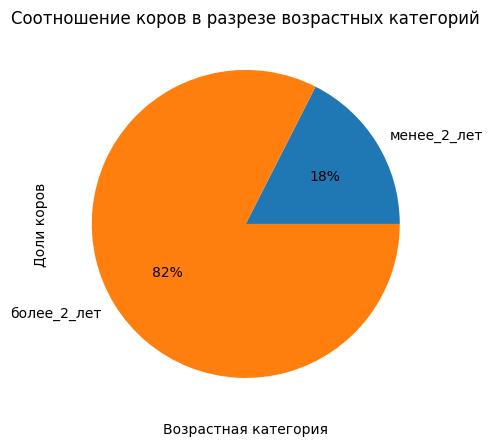

,count_of_cows,share_of_cows
age,,
более_2_лет,518,82.48
менее_2_лет,110,17.52


In [82]:
# вывод на экран визуализации по соотношению коров в разрезе возраста
display_info(full_ferma_data, 'age', 'Соотношение коров в разрезе возрастных категорий', 'Возрастная категория', 'Доли коров', 'pie')

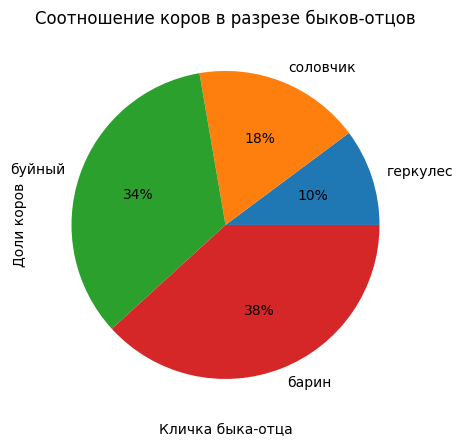

,count_of_cows,share_of_cows
father_bull_name,,
барин,240,38.22
буйный,214,34.08
соловчик,110,17.52
геркулес,64,10.19


In [83]:
# вывод на экран визуализации по соотношению коров в разрезе быков-отцов
display_info(full_ferma_data, 'father_bull_name', 'Соотношение коров в разрезе быков-отцов', 'Кличка быка-отца', 'Доли коров', 'pie')

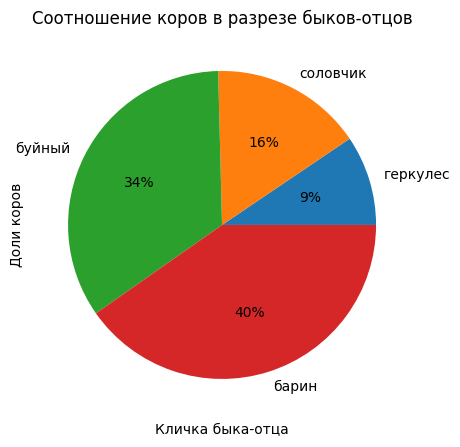

,count_of_cows,share_of_cows
father_bull_name,,
барин,149,40.27
буйный,127,34.32
соловчик,59,15.95
геркулес,35,9.46


In [84]:
# вывод на экран визуализации по соотношению коров, дающих вкусное молоко, в разрезе быков-отцов
display_info(full_ferma_data.query('milk_taste == "вкусно"'), 'father_bull_name', 'Соотношение коров в разрезе быков-отцов', 'Кличка быка-отца', 'Доли коров', 'pie')

In [92]:
# формирование свода по коровам со вкусным молоков в разрезе быков-отцов
tasty_milk_pivot = full_ferma_data[full_ferma_data['milk_taste'] == 'вкусно'].groupby('father_bull_name').agg({'cow_id' : 'count'}).rename(columns = {'cow_id':'tasty_milk_cows'})

# формирование свода по всем коровам в разрезе быков-отцов
milk_pivot = full_ferma_data.groupby('father_bull_name').agg({'cow_id' : 'count'}).rename(columns = {'cow_id':'all_cows'})

# формирование общего свода
full_milk_pivot = tasty_milk_pivot.join(milk_pivot)
full_milk_pivot['%_of_tasty_milk'] = round(full_milk_pivot['tasty_milk_cows'] * 100 / full_milk_pivot['all_cows'], 2)
display(full_milk_pivot.sort_values(by = '%_of_tasty_milk', ascending = False))

,tasty_milk_cows,all_cows,%_of_tasty_milk
father_bull_name,,,
барин,149,240,62.08
буйный,127,214,59.35
геркулес,35,64,54.69
соловчик,59,110,53.64
